# load modules

In [1]:
import subprocess
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = 'Arial'
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

In [2]:
import bs4 as bs
import urllib
import requests

In [3]:
import json

In [6]:
import dask.dataframe as dd

# 11 candidate, 40 filtered
output: `candidate_maternal_tr_ls`

In [10]:
# select ww's 25 maternal factors and turn to transcript format
# output: candidate_maternal_tr_ls

filtered_40 = ['accs', 'chek2', 'chfr', 'cop1', 'cpeb1b', 
               'ftr81', 'golga1', 'kank1b', 'kifc3', 'lhx8a', 
               'lmx1a', 'mcm3l', 'mcm6l', 'med13b', 'nin', 
               'ninl', 'npm2a', 'nsmce1', 'orc1', 'orc6', 
               'recql4', 'rufy1', 'scnm1', 'si:ch211-203d1.3', 'si:dkeyp-34c12.1', 
               'specc1lb', 'spire1a', 'ssx2ipa', 'supv3l1', 'trim35-29', 
               'trim36', 'uacab', 'usp16', 'zgc:113984', 'zgc:114123', 
               'zgc:162936', 'zgc:165514', 'zgc:56231', 'zglp1', 'znf653']
filtered_40_trans = ['ENSDART00000000042', 'ENSDART00000004284', 'ENSDART00000005112', 'ENSDART00000019078', 'ENSDART00000024062', 'ENSDART00000024185', 'ENSDART00000036421', 'ENSDART00000054653', 'ENSDART00000066086', 'ENSDART00000073914', 'ENSDART00000074729', 'ENSDART00000077251', 'ENSDART00000078066', 'ENSDART00000078124', 
                    'ENSDART00000085512', 'ENSDART00000085645', 'ENSDART00000091177', 'ENSDART00000097468', 'ENSDART00000098578', 'ENSDART00000098904', 'ENSDART00000102239', 'ENSDART00000106627', 'ENSDART00000108556', 'ENSDART00000109130', 'ENSDART00000110060', 'ENSDART00000110783', 'ENSDART00000111774', 'ENSDART00000112082', 
                    'ENSDART00000112214', 'ENSDART00000113609', 'ENSDART00000113732', 'ENSDART00000115227', 'ENSDART00000115307', 'ENSDART00000122385', 'ENSDART00000122979', 'ENSDART00000128591', 'ENSDART00000129562', 'ENSDART00000130492', 'ENSDART00000131761', 'ENSDART00000132184', 'ENSDART00000132351', 'ENSDART00000133835', 
                    'ENSDART00000133880', 'ENSDART00000134938', 'ENSDART00000135214', 'ENSDART00000138075', 'ENSDART00000138511', 'ENSDART00000139609', 'ENSDART00000140357', 'ENSDART00000142233', 'ENSDART00000142569', 'ENSDART00000144273', 'ENSDART00000144694', 'ENSDART00000144851', 'ENSDART00000145288', 'ENSDART00000146292', 
                    'ENSDART00000146728', 'ENSDART00000147117', 'ENSDART00000147942', 'ENSDART00000150899', 'ENSDART00000151155', 'ENSDART00000151213', 'ENSDART00000151255', 'ENSDART00000151331', 'ENSDART00000152355', 'ENSDART00000153597', 'ENSDART00000155956', 'ENSDART00000160730', 'ENSDART00000161277', 'ENSDART00000162026', 
                    'ENSDART00000162918', 'ENSDART00000167283', 'ENSDART00000168784', 'ENSDART00000169469', 'ENSDART00000171731', 'ENSDART00000171782', 'ENSDART00000174137', 'ENSDART00000174165', 'ENSDART00000176877', 'ENSDART00000177841', 'ENSDART00000178746', 'ENSDART00000179326', 
                    'ENSDART00000180666', 'ENSDART00000180705', 'ENSDART00000186733', 'ENSDART00000188206', 'ENSDART00000189498', 'ENSDART00000190814', 'ENSDART00000190891', 'ENSDART00000191309', 'ENSDART00000191909', 'ENSDART00000193153', 'ENSDART00000193791']

candidate_11 = ['ftr81',
                'kank1b',
                'lmx1a',
                'mcm3l',
                'mcm6l',
                'npm2a',
                'orc1',
                'zgc:114123',
                'zgc:165514',
                'zgc:56231',
                'zglp1']
        
finame = '/mnt/Storage/home/wangyiman/source/bySpecies/danRer11_2/ensGene/danRer11_2.ensGene.genePredExt'
tr_gene_pd = pd.read_table(finame, header=None, sep="\t", encoding="utf-8")
tr_gene_pd = tr_gene_pd.iloc[:,[0,11]]
tr_gene_pd.columns = ['transcript_id', 'gene_id']
finame = '/mnt/Storage/home/wangyiman/source/bySpecies/danRer11_2/ensGene/danRer11.ensGeneToGeneSymbol.txt'
gene_symbol_pd = pd.read_table(finame, header=None, sep="\t", encoding="utf-8")
gene_symbol_pd.columns = ['gene_id', 'gene_symbol']
tr_gene_symbol_pd = pd.merge(tr_gene_pd, gene_symbol_pd, on="gene_id")

filtered40_trid_geneid_sym = tr_gene_symbol_pd.loc[tr_gene_symbol_pd["transcript_id"].isin(filtered_40_trans)]
tr_gene_symbol_pd.head()

,transcript_id,gene_id,gene_symbol
0,ENSDART00000164359.1,ENSDARG00000099104.1,rpl24
1,ENSDART00000158290.1,ENSDARG00000099104.1,rpl24
2,ENSDART00000157701.1,ENSDARG00000099104.1,rpl24
3,ENSDART00000167898.1,ENSDARG00000099104.1,rpl24
4,ENSDART00000166393.1,ENSDARG00000102407.2,cep97


# 9 candidate, 30 filtered
output: `candidate_maternal_tr_ls`

In [105]:
# select ww's 25 maternal factors and turn to transcript format
# output: candidate_maternal_tr_ls

filtered_30 = ['accs',
 'chek2',
 'chfr',
 'cpeb1b',
 'ftr81',
 'golga1',
 'kank1b',
 'kifc3',
 'lhx8a',
 'lmx1a',
 'mcm3l',
 'mcm6l',
 'med13b',
 'nin',
 'ninl',
 'npm2a',
 'nsmce1',
 'orc1',
 'orc6',
 'scnm1',
 'si:dkeyp-34c12.1',
 'specc1lb',
 'supv3l1',
 'trim35-29',
 'trim36',
 'uacab',
 'usp16',
 'zgc:113984',
 'zgc:165514',
 'zgc:56231']
filtered_30_trans = set(tr_gene_symbol_pd.loc[tr_gene_symbol_pd['gene_symbol'].isin(filtered_30)]['transcript_id'].tolist()) & set(filtered_40_trans)
candidate_9 = ['ftr81',
                'kank1b',
                'lmx1a',
                'mcm3l',
                'mcm6l',
                'npm2a',
                'orc1',
#                 'zgc:114123',
                'zgc:165514',
                'zgc:56231',
#                 'zglp1'
              ]

In [72]:
tr_gene_symbol_pd_clean = tr_gene_symbol_pd.copy()
tr_gene_symbol_pd_clean['transcript_id_clean'] = tr_gene_symbol_pd_clean['transcript_id'].str.split('.', expand = True)[0]
tr_gene_symbol_pd_clean['gene_id_clean'] = tr_gene_symbol_pd_clean['gene_id'].str.split('.', expand = True)[0]
tr_gene_symbol_pd_clean

,transcript_id,gene_id,gene_symbol,transcript_id_clean,gene_id_clean
0,ENSDART00000164359.1,ENSDARG00000099104.1,rpl24,ENSDART00000164359,ENSDARG00000099104
1,ENSDART00000158290.1,ENSDARG00000099104.1,rpl24,ENSDART00000158290,ENSDARG00000099104
2,ENSDART00000157701.1,ENSDARG00000099104.1,rpl24,ENSDART00000157701,ENSDARG00000099104
3,ENSDART00000167898.1,ENSDARG00000099104.1,rpl24,ENSDART00000167898,ENSDARG00000099104
4,ENSDART00000166393.1,ENSDARG00000102407.2,cep97,ENSDART00000166393,ENSDARG00000102407
...,...,...,...,...,...
65835,ENSDART00000183313.1,ENSDARG00000114956.1,dre-mir-430b-10,ENSDART00000183313,ENSDARG00000114956
65836,ENSDART00000183313.1,ENSDARG00000114956.1,dre-mir-430b-10,ENSDART00000183313,ENSDARG00000114956
65837,ENSDART00000183313.1,ENSDARG00000114956.1,dre-mir-430b-10,ENSDART00000183313,ENSDARG00000114956
65838,ENSDART00000183313.1,ENSDARG00000114956.1,dre-mir-430b-10,ENSDART00000183313,ENSDARG00000114956


In [16]:
tr_gene_pd_clean = pd.DataFrame(zip(list(zip(*tr_gene_symbol_pd['transcript_id'].str.split('.')))[0], list(zip(*tr_gene_symbol_pd['gene_id'].str.split('.')))[0]))
tr_gene_pd_clean.columns = ['transcript_id_clean', 'gene_id_clean']
tr_gene_pd_clean

,transcript_id_clean,gene_id_clean
0,ENSDART00000164359,ENSDARG00000099104
1,ENSDART00000158290,ENSDARG00000099104
2,ENSDART00000157701,ENSDARG00000099104
3,ENSDART00000167898,ENSDARG00000099104
4,ENSDART00000166393,ENSDARG00000102407
...,...,...
65835,ENSDART00000183313,ENSDARG00000114956
65836,ENSDART00000183313,ENSDARG00000114956
65837,ENSDART00000183313,ENSDARG00000114956
65838,ENSDART00000183313,ENSDARG00000114956


# exon to trans

In [13]:
exon_len_Over50 = dd.read_csv('/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/danRer11_2.ensGene.exon_lenOver50.bed',
                              sep = '\t', usecols = [3], header = None).iloc[:,0]


In [14]:
# exon_id_ls = dd.DataFrame(zip(*pd.DataFrame(zip(*dd.read_csv('/mnt/Storage/home/wangyiman/source/bySpecies/danRer11_2/ensGene/danRer11_2.ensGene.ExonUniq.gtf', 
#                                      sep = '\t', header = 0).iloc[:,8].drop_duplicates().str.split(';'))).T.iloc[:,0].drop_duplicates().str.split('"'))).T.iloc[:,1].tolist()

exon_id_ls = exon_len_Over50.compute()

In [17]:
exon_gene_id_dict = {}
exon_gene_id_dict_nonUniq = {}
for exon_id in set(exon_id_ls) :
    trans_ids = [('ENSDART'+x).strip('_') for x in exon_id.split('ENSDART') if x]    
    gene_ids = []
    for trans_id in trans_ids :
        gene_id_series = tr_gene_pd_clean.loc[tr_gene_pd_clean['transcript_id_clean'] == trans_id.split('.')[0]]['gene_id_clean'].tolist()
        if gene_id_series : 
            gene_ids.append(gene_id_series[0])
        else :
            print(exon_id)
        
    if len(set(gene_ids)) == 1 :
        exon_gene_id_dict[exon_id] = gene_ids[0]
    else :
#         print(gene_ids, exon_id)
        exon_gene_id_dict_nonUniq[exon_id] = gene_ids
        

In [18]:
len(exon_gene_id_dict)

297090

In [19]:
len(exon_gene_id_dict_nonUniq)

1798

In [20]:
len(set(exon_id_ls))

298888

In [21]:
exon_tr_gene_pd_clean = pd.merge(tr_gene_pd_clean, pd.DataFrame.from_dict(exon_gene_id_dict, orient='index').reset_index(), 
                                  left_on = 'gene_id_clean', right_on = 0).iloc[:,:-1]
exon_tr_gene_pd_clean.columns = ['transcript_id_clean', 'gene_id_clean', 'exon_id']
exon_tr_gene_pd_clean

,transcript_id_clean,gene_id_clean,exon_id
0,ENSDART00000164359,ENSDARG00000099104,ENSDART00000167898.1.1
1,ENSDART00000164359,ENSDARG00000099104,ENSDART00000164359.1.1
2,ENSDART00000164359,ENSDARG00000099104,ENSDART00000164359.1.4_ENSDART00000167898.1.4
3,ENSDART00000164359,ENSDARG00000099104,ENSDART00000167898.1.5
4,ENSDART00000164359,ENSDARG00000099104,ENSDART00000164359.1.5
...,...,...,...
1018618,ENSDART00000168273,ENSDARG00000104674,ENSDART00000168273.2.8
1018619,ENSDART00000168273,ENSDARG00000104674,ENSDART00000168273.2.1
1018620,ENSDART00000168273,ENSDARG00000104674,ENSDART00000168273.2.7
1018621,ENSDART00000168273,ENSDARG00000104674,ENSDART00000168273.2.6


In [22]:
exon_tr_gene_pd_clean.to_csv('/mnt/Storage/home/wangyiman/source/bySpecies/danRer11_2/ensGene/danRer11_2.ensGene.TranscriptGeneExonID.tsv', 
                            sep = "\t", index = None)

# expression level

In [7]:
# read in .tsv

# os.chdir('/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/analysis_embryoExon_tissueExon')
# expr_combat_dict = {}
# for expression_type in ['TPM'] :
#     for finame in [f'ovary_earlyEmbryo_exon_{expression_type}_matrix_exOvary_ComBatSeq_byBatch.csv', 
#                    f'lateEmbryo_tissue_exon_{expression_type}_matrix_exOvary_ComBatSeq_byBatch.csv'] :
#         expr_pd = dd.read_csv(finame, header=0, sep=",", encoding="utf-8")
#         expr_pd['exon_id'] = expr_pd['Unnamed: 0'].str.split('|', expand = True, n = 1)[0]
# #         expr_3id = dd.merge(expr_pd.drop('Unnamed: 0', axis = 1), exon_tr_gene_pd_clean, on="exon_id")
#         expr_3id = expr_pd.drop('Unnamed: 0', axis = 1)
#         expr_3id.index = expr_3id['exon_id'].astype('category')
# #         expr_3id['transcript_id_clean'] = expr_3id['transcript_id_clean'].astype('category')
# #         expr_3id['gene_id_clean'] = expr_3id['gene_id_clean'].astype('category')
#         k = f'{finame[:17]}_{expression_type}'
#         expr_combat_dict[k] = expr_3id.drop('exon_id', axis = 1)
#         expr_combat_dict[k].columns = [x.strip('X') for x in expr_combat_dict[k].columns]
        

/mnt/Storage/home/wangyiman/anaconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


In [37]:
expr_filtered_exon_gene_clean_embryoTissue = pd.read_csv('/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/embryo_tissue_filtered_expr_mean_high_corr_exonOver50.tsv',
                                                  sep = "\t",)
expr_filtered_exon_gene_clean_embryoTissue

,exon_id,oocyte,1_cell,2_cell,4_cell,24_cell,64_cell,128_cell,256_cell,1k_cell,...,kidney_HSC_gata2a_p_runx1,kidney,liver_female,liver_male,liver,muscle,retina_muller,valve,ventricle,testis
0,ENSDART00000165693.1.3_ENSDART00000169744.1.2,0.043023,0.127686,0.128291,5.415009,0.020069,0.202563,0.093051,0.029526,0.063451,...,0.041254,0.027528,0.023839,0.062683,0.025193,0.021998,0.000000,0.000000,0.019728,0.104900
1,ENSDART00000109083.5.1,0.661466,0.436352,1.292262,0.000000,2.276450,0.060663,0.000000,2.610899,0.004193,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,ENSDART00000092324.5.7_ENSDART00000179970.1.7,1.074883,2.091899,0.802160,0.154763,7.336979,0.014274,1.194012,1.638048,1.325248,...,0.000000,0.000000,0.034695,0.000000,0.379854,0.044401,0.137369,0.102580,0.019069,0.547866
3,ENSDART00000092324.5.10_ENSDART00000179970.1.10,2.232449,4.019212,1.851665,0.000000,6.365806,0.101648,2.246396,1.415623,2.240854,...,0.000000,0.000000,0.081714,0.094520,0.785314,0.046070,0.000000,0.828998,0.027183,0.573706
4,ENSDART00000092324.5.13_ENSDART00000179970.1.13,0.000000,0.598652,0.000000,0.000000,3.112164,0.000000,0.000000,0.359622,0.473996,...,0.000000,0.000000,0.000000,0.031837,0.100181,0.105593,0.068684,0.404832,0.000000,0.358534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,ENSDART00000154125.3_5.2,0.000000,0.022262,0.000000,0.000000,0.078441,0.000000,0.000000,0.000000,0.244676,...,0.000000,0.007887,0.000000,0.000000,0.017383,0.000000,0.000000,0.000000,0.016809,0.061103
981,ENSDART00000154125.3_5.3,0.000000,0.000000,0.000000,0.000000,0.023532,0.000000,0.000000,0.002079,0.206789,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003194,0.061103
982,ENSDART00000154125.3_5.6,0.000000,0.011114,0.000000,0.000000,0.133349,0.000000,0.022456,0.000000,0.394836,...,0.000000,0.019644,0.000000,0.000000,0.043361,0.024072,0.068684,0.139917,0.045718,0.040618
983,ENSDART00000144849.3.3,18.821725,0.193666,0.109114,27.489778,4.758632,0.009869,0.113374,0.712752,0.215931,...,0.000000,0.000000,0.784810,0.000000,0.035153,0.021998,0.085799,0.000000,0.000000,0.007882


In [29]:
filtered_40_exon = exon_tr_gene_pd_clean.loc[exon_tr_gene_pd_clean['transcript_id_clean'].isin([x.split('.')[0] for x in filtered_40_trans])]['exon_id'].unique().tolist()
len(filtered_40_exon)

662

In [106]:
filtered_30_exon = exon_tr_gene_pd_clean.loc[exon_tr_gene_pd_clean['transcript_id_clean'].isin([x.split('.')[0] for x in filtered_30_trans])]['exon_id'].unique().tolist()
len(filtered_30_exon)

0

In [93]:
filtered40_expr_df = expr_filtered_exon_gene_clean_embryoTissue.loc[expr_filtered_exon_gene_clean_embryoTissue['exon_id'].isin(filtered_40_exon)]
filtered40_expr_df = pd.merge(tr_gene_symbol_pd_clean, pd.merge(exon_tr_gene_pd_clean, filtered40_expr_df.iloc[:,:25], on = 'exon_id'))
filtered40_expr_df['total'] = filtered40_expr_df.sum(axis = 1, numeric_only =True)
filtered40_expr_df['max'] = filtered40_expr_df.iloc[:,:-1].max(axis = 1, numeric_only =True)
filtered40_expr_df

,transcript_id,gene_id,gene_symbol,transcript_id_clean,gene_id_clean,exon_id,oocyte,1_cell,2_cell,4_cell,...,shield,7hpf,8hpf,bud,10.33hpf,16hpf,19hpf,20ss,total,max
0,ENSDART00000162026.2,ENSDARG00000098414.2,ninl,ENSDART00000162026,ENSDARG00000098414,ENSDART00000162026.2.16,0.147891,1.780893,0.197908,0.061905,...,0.124977,0.737046,0.199949,0.389906,0.185232,0.107895,0.268439,0.461453,20.733621,10.260420
1,ENSDART00000162026.2,ENSDARG00000098414.2,ninl,ENSDART00000162026,ENSDARG00000098414,ENSDART00000162026.2.9,0.000000,2.237812,0.000000,0.000000,...,0.005558,0.062000,0.000000,0.164775,0.000000,0.000000,0.024079,0.365155,8.935196,5.321738
2,ENSDART00000111774.3,ENSDARG00000077728.4,supv3l1,ENSDART00000111774,ENSDARG00000077728,ENSDART00000111774.3.8,0.082683,2.492953,0.043782,0.000000,...,0.190467,0.223202,0.217478,0.275413,0.197226,0.050224,0.051472,0.258635,13.874702,5.624056
3,ENSDART00000125257.3,ENSDARG00000077728.4,supv3l1,ENSDART00000125257,ENSDARG00000077728,ENSDART00000111774.3.8,0.082683,2.492953,0.043782,0.000000,...,0.190467,0.223202,0.217478,0.275413,0.197226,0.050224,0.051472,0.258635,13.874702,5.624056
4,ENSDART00000177841.2,ENSDARG00000109055.2,ftr81,ENSDART00000177841,ENSDARG00000109055,ENSDART00000177841.2.5,0.086045,6.088208,1.707729,0.337104,...,0.074549,0.066386,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.865714,14.167823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,ENSDART00000142233.2,ENSDARG00000094616.4,zgc:113984,ENSDART00000142233,ENSDARG00000094616,ENSDART00000176877.2.5_ENSDART00000190891.1.4_...,0.000000,3.405682,0.333384,0.000000,...,0.339051,0.000000,0.000000,0.172485,0.000000,0.000000,0.000000,0.000000,31.327701,13.301727
260,ENSDART00000142233.2,ENSDARG00000094616.4,zgc:113984,ENSDART00000142233,ENSDARG00000094616,ENSDART00000133880.3.9,0.000000,15.918922,0.000000,0.000000,...,0.077139,0.000000,0.000000,0.046296,0.000000,0.000000,0.000000,0.000000,35.024673,15.918922
261,ENSDART00000145657.2,ENSDARG00000094616.4,zgc:113984,ENSDART00000145657,ENSDARG00000094616,ENSDART00000144851.3.8_ENSDART00000133880.3.8_...,0.000000,8.884253,0.428189,0.000000,...,0.280748,0.000000,0.000000,0.057247,0.000000,0.000000,0.000000,0.000000,20.610753,8.884253
262,ENSDART00000145657.2,ENSDARG00000094616.4,zgc:113984,ENSDART00000145657,ENSDARG00000094616,ENSDART00000176877.2.5_ENSDART00000190891.1.4_...,0.000000,3.405682,0.333384,0.000000,...,0.339051,0.000000,0.000000,0.172485,0.000000,0.000000,0.000000,0.000000,31.327701,13.301727


In [175]:
filtered40_expr_df.to_csv('/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/filtered_exons/filtered40_exonID_geneSymbols.tsv',
                         sep = "\t", index = False)

In [49]:
filtered40_expr_df.columns[:25]

Index(['exon_id', 'oocyte', '1_cell', '2_cell', '4_cell', '24_cell', '64_cell',
       '128_cell', '256_cell', '1k_cell', 'high', 'oblong', '4hpf', 'sphere',
       'dome', '50epi', '6hpf', 'shield', '7hpf', '8hpf', 'bud', '10.33hpf',
       '16hpf', '19hpf', '20ss'],
      dtype='object')

In [104]:
filtered40_1cell_ov5 = filtered40_expr_df.loc[filtered40_expr_df['1_cell'] >= 5]['gene_symbol'].unique().tolist()
filtered40_1cell_ov5

['ftr81',
 'trim35-29',
 'scnm1',
 'kifc3',
 'ssx2ipa',
 'mcm6l',
 'mcm3l',
 'lmx1a',
 'si:dkeyp-34c12.1',
 'zgc:114123',
 'kank1b',
 'orc1',
 'zgc:56231',
 'trim36',
 'npm2a',
 'zgc:113984']

In [100]:
filtered40_expr_df_rank = filtered40_expr_df[['gene_symbol', 'max', 'total']].groupby(['gene_symbol']).max()
filtered40_expr_df_rank['max_rank'] = filtered40_expr_df_rank['max'].rank(ascending =False)
filtered40_expr_df_rank['total_rank'] = filtered40_expr_df_rank['total'].rank(ascending = False)
filtered40_expr_df_rank.loc[filtered40_expr_df_rank.index.isin(candidate_11)].sort_values(['max_rank', 'total_rank'])

,max,total,max_rank,total_rank
gene_symbol,,,,
zgc:114123,306.359981,596.641745,1.0,1.0
kank1b,72.910715,336.921771,2.0,2.0
zgc:56231,58.303344,218.022522,3.0,4.0
mcm3l,35.273866,188.546784,6.0,5.0
mcm6l,24.535706,158.410392,7.0,7.0
ftr81,20.984209,73.309461,10.0,9.0
orc1,16.716861,54.358671,12.0,12.0
lmx1a,13.231399,63.872358,14.0,11.0
zglp1,9.048396,17.129744,19.0,32.0


In [101]:
filtered40_expr_df_rank.sort_values(['max_rank', 'total_rank'])

,max,total,max_rank,total_rank
gene_symbol,,,,
zgc:114123,306.359981,596.641745,1.0,1.0
kank1b,72.910715,336.921771,2.0,2.0
zgc:56231,58.303344,218.022522,3.0,4.0
si:dkeyp-34c12.1,36.382018,231.842558,4.0,3.0
trim35-29,36.242806,167.327731,5.0,6.0
mcm3l,35.273866,188.546784,6.0,5.0
mcm6l,24.535706,158.410392,7.0,7.0
ssx2ipa,24.044581,72.360996,8.0,10.0
trim36,22.592091,47.962513,9.0,13.0


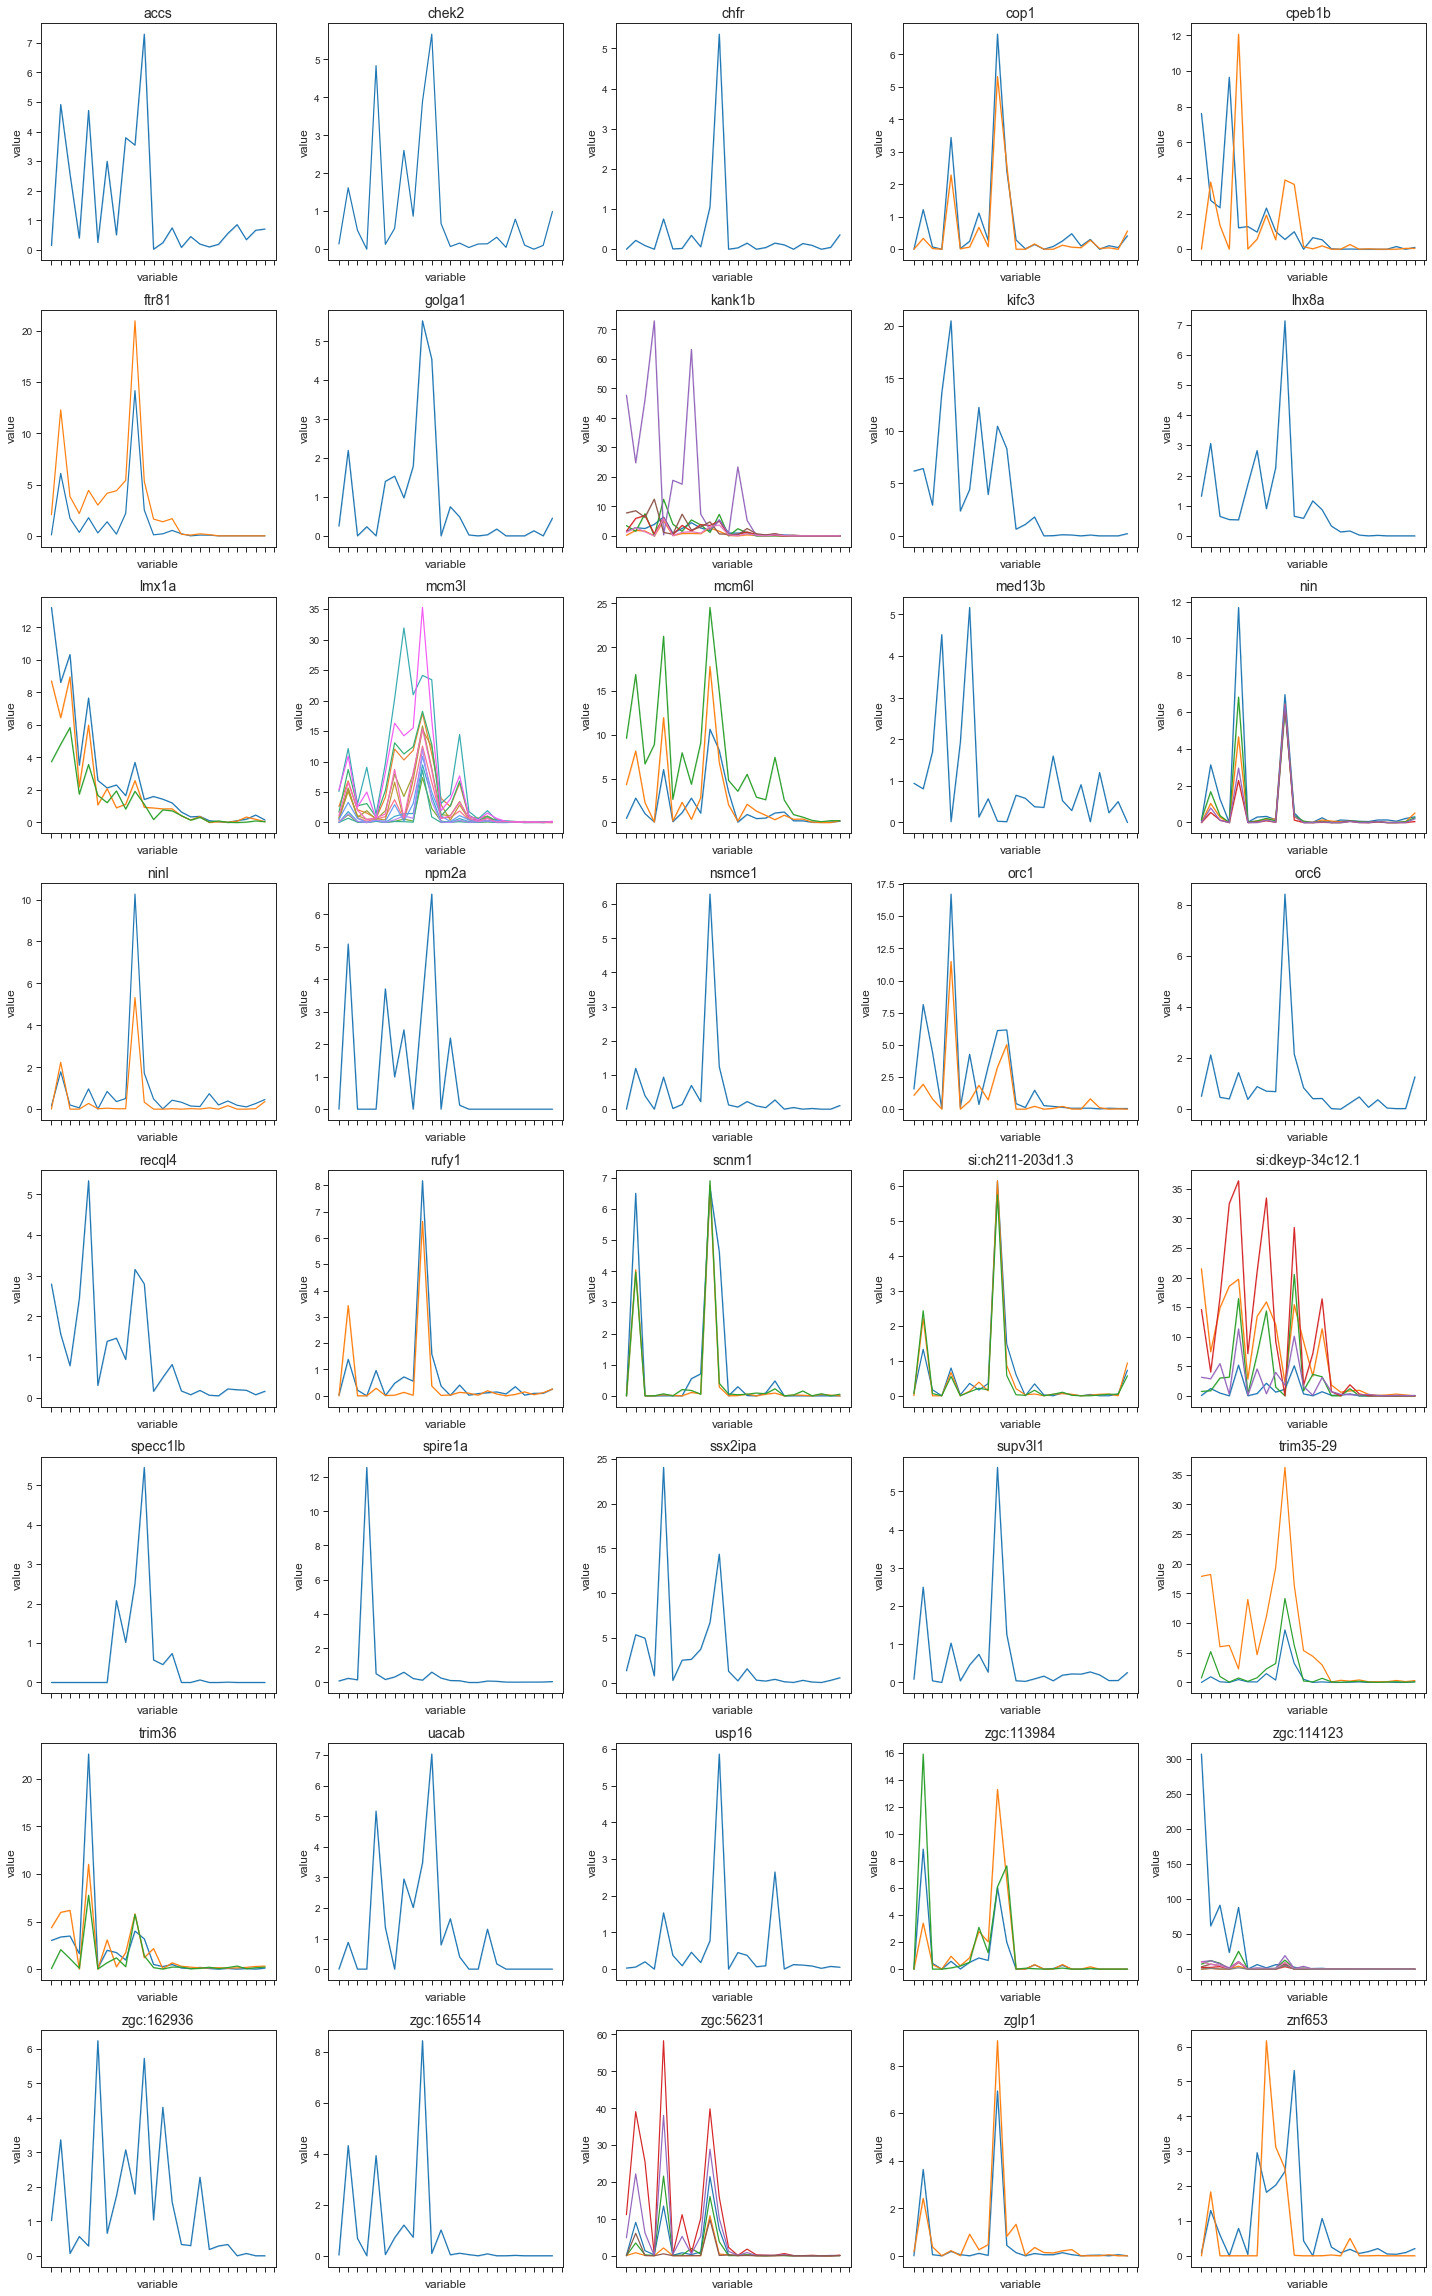

In [76]:
with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    fig, axes = plt.subplots(8,5, figsize = (20, 32), tight_layout = True)
    for i,gene in enumerate(filtered_40) :
        df = filtered40_expr_df.loc[filtered40_expr_df['gene_symbol'] == gene].iloc[:,5:].melt(id_vars = 'exon_id')
        ax = axes[int(i/5), i%5]
        sns.lineplot(
            data = df,
            x = 'variable',
            y = 'value',
            hue = 'exon_id',
            legend = False,
            ax = ax
        )
        ax.set_title(gene)
        ax.set_xticks(range(25))
        ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)


# CDD

## read in

In [109]:
# hitdata_df_filtered_knownDomain = pd.read_csv('/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/filtered_exons/hitdata_superfamily_DNAbinding_chrom_nucleo_knownDomains.csv')
hitdata_df_filtered_knownDomain = pd.read_csv('/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/filtered_exons/hitdata_superfamily_DNAbinding_chrom_nucleo_knownDomain2.csv')
hitdata_df_filtered_knownDomain['gene_symbol'] = hitdata_df_filtered_knownDomain['query'].str.split('GN=', expand = True)[1].str.split(' ', expand = True)[0]
hitdata_df_filtered_knownDomain.head(2)

,query,query_number,Short name,class,Definition,gene_symbol
0,Q#1 - >tr|A0A0E4AYA7|A0A0E4AYA7_DANRE DNA repl...,Q#1,MCM superfamily,minichromosome maintenance,minichromosome maintenance proteins; minichrom...,mcm6l
1,Q#1 - >tr|A0A0E4AYA7|A0A0E4AYA7_DANRE DNA repl...,Q#1,MCM6_C superfamily,minichromosome maintenance,MCM6 C-terminal winged-helix domain; The minic...,mcm6l


In [110]:
# hitdata_df_filtered_newDomain = pd.read_csv('/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/filtered_exons/hitdata_superfamily_DNAbinding_chrom_nucleo_newDomains.csv')
hitdata_df_filtered_newDomain = pd.read_csv('/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/filtered_exons/hitdata_superfamily_DNAbinding_chrom_nucleo_newDomain2.csv')
hitdata_df_filtered_newDomain['gene_symbol'] = hitdata_df_filtered_newDomain['query'].str.split('GN=', expand = True)[1].str.split(' ', expand = True)[0]
hitdata_df_filtered_newDomain.head(2)

,query,query_number,Short name,class,Definition,gene_symbol
0,Q#124 - >tr|E7EZK3|E7EZK3_DANRE Si:ch211-203d1...,Q#124,DEK_C superfamily,DEK domain,DEK C terminal domain; DEK is a chromatin asso...,si:ch211-203d1.3
1,"Q#205 - >tr|F1R4W7|F1R4W7_DANRE Zinc finger, M...",Q#205,Bromodomain superfamily,Bromodomain,Bromodomain. Bromodomains are found in many ch...,zmynd11


In [117]:
CDD_domain_df_class = pd.read_csv('/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/filtered_exons/CDD_domain_df_class.tsv',
                                 sep = "\t",
                                 )
CDD_domain_df_class

,class,class_times,super_class
0,BAH domain,1,Chromatin structure
1,RecF/RecN/SMC,17,Chromatin structure
2,Nucleoplasmin,1,Chromatin structure
3,minichromosome maintenance,2,Chromatin structure
4,H4 superfamily,1,Chromatin structure
5,ubinuclein (histone),1,Chromatin structure
6,DNA/RNA helicase,1,Chromatin structure
7,DEK domain,1,Chromatin structure
8,Bromodomain,1,Chromatin structure
9,Forkhead domain,4,DNA binding


In [149]:
hitdata_df_filtered_knownDomain.loc[hitdata_df_filtered_knownDomain['class'] == 'DNA-cytosine methylase']

,query,query_number,Short name,class,Definition,gene_symbol
71,Q#266 - >tr|Q588C3|Q588C3_DANRE DNA (cytosine-...,Q#266,Cyt_C5_DNA_methylase superfamily,DNA-cytosine methylase,Cytosine-C5 specific DNA methylases; Methyl tr...,dnmt3ba


In [130]:
hitdata_df_filtered = pd.merge(pd.concat([hitdata_df_filtered_knownDomain, hitdata_df_filtered_newDomain]), CDD_domain_df_class,
                              on = 'class')
hitdata_df_filtered = hitdata_df_filtered.loc[hitdata_df_filtered['gene_symbol'].isin(filtered_40)]
len(hitdata_df_filtered['gene_symbol'].unique())

40

In [172]:
hitdata_df_filtered_byDomain = hitdata_df_filtered.groupby('class').agg({'gene_symbol': lambda x: ', '.join(set(x))})
hitdata_df_filtered_byDomain['candidates'] = [', '.join([y for y in x.split(', ') if y in candidate_11]) for x in hitdata_df_filtered_byDomain['gene_symbol']]
hitdata_df_filtered_byDomain = pd.merge(hitdata_df_filtered_byDomain, CDD_domain_df_class[['class', 'super_class']], on = 'class').sort_values(['super_class', 'candidates'])
hitdata_df_filtered_byDomain.to_csv('/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/filtered_exons/hitdata_df_filtered_byDomain.tsv',
                                   sep = "\t", index = None)

In [148]:
hitdata_df_filtered_byClass = hitdata_df_filtered.groupby('super_class').agg({'gene_symbol': lambda x: ', '.join(set(x))})
hitdata_df_filtered_byClass['candidates'] = [', '.join([y for y in x.split(', ') if y in candidate_11]) for x in hitdata_df_filtered_byClass['gene_symbol']]
hitdata_df_filtered_byClass

,gene_symbol,candidates
super_class,,
Chromatin structure,"trim35-29, si:dkeyp-34c12.1, kank1b, uacab, ss...","kank1b, zgc:56231, ftr81, mcm6l, mcm3l, orc1, ..."
DNA binding,"trim35-29, zgc:165514, spire1a, cpeb1b, recql4...","zgc:165514, lmx1a, ftr81, zgc:114123, orc1, zglp1"


## expression level

In [173]:
hitdata_df_filtered_byClass_long = hitdata_df_filtered_byClass['gene_symbol'].str.split(', ', expand = True).T.melt()
hitdata_df_filtered_byClass_long['candidate'] = [True if x in candidate_11 else False for x in hitdata_df_filtered_byClass_long['value']]
hitdata_df_filtered_byClass_long = hitdata_df_filtered_byClass_long.dropna().drop_duplicates()
hitdata_df_filtered_byClass_long.columns = ['super_class', 'gene_symbol', 'candidate']
hitdata_df_filtered_byClass_long = pd.merge(hitdata_df_filtered_byClass_long, filtered40_expr_df_rank, on = 'gene_symbol').sort_values(['super_class', 'total', 'max'], ascending = False)
hitdata_df_filtered_byClass_long[['super_class', 'gene_symbol', 'candidate', 'total', 'max']].to_csv('/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/filtered_exons/hitdata_df_filtered_byClass_long.tsv', 
                                       index = False, 
                                                                                                     sep = "\t"
                                       )
hitdata_df_filtered_byClass_long.head(2)

,super_class,gene_symbol,candidate,max,total,max_rank,total_rank
34,DNA binding,zgc:114123,True,306.359981,596.641745,1.0,1.0
1,DNA binding,trim35-29,False,36.242806,167.327731,5.0,6.0
